## Seung Jun Choi in Urban Information Lab
## Machine Learning in Uber & Price Forecast Modelling

## Learning Objectives
### 1. Understand the machine learning approahces to time series data
### 2. Understand Uber's ML Strategy
### 3. Review Uber Price Prediction Forecast Modeling

## Introduction
Let’s explore the merits of using deep learning and other machine learning approach in the area of forecasting and describe some of the machine learning approaches Uber uses to forecast time series of business relevance.

### What are the benefits of using machine learning in company like Uber?

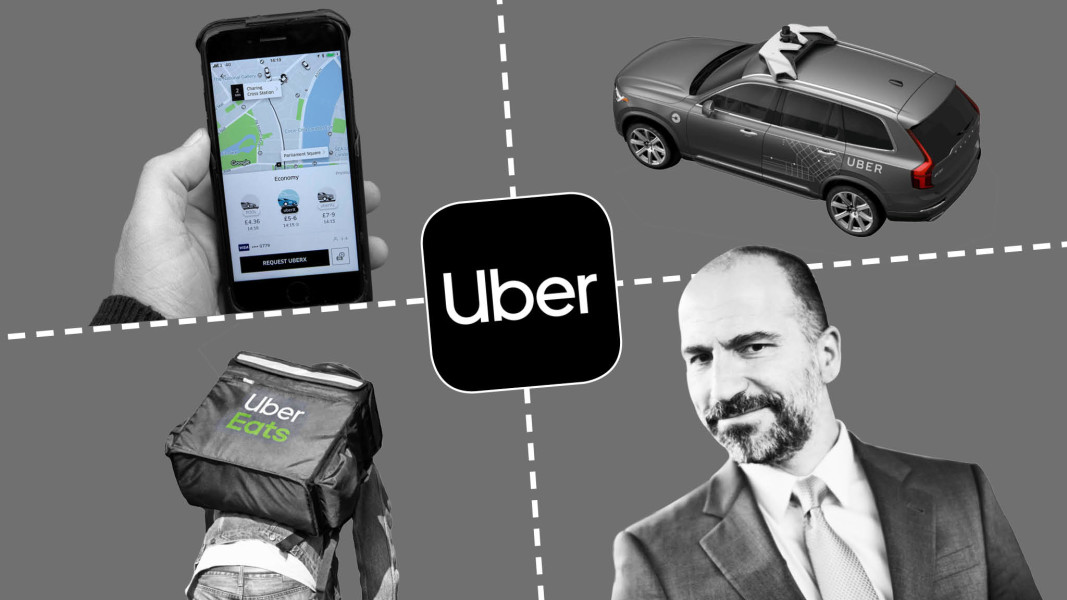

First of all, one should realize that at Uber, times series are completely and utterly ubiquitous. They are pretty much everywhere. First and foremost, there are the markets. Now, there are many ways of thinking of Uber, but one important way of thinking about it, arguably the most important, is that Uber provides a platform to broker transactions in a variety of markets, usually to do with transportation or delivery. Now, a good brokering platform needs to have a way of taking a snapshot of the state of the market in many ways, and then it involves time. This is why Uber has as many time series as you could possibly imagine about the markets Uber operates in.

And as you can imagine for a brokerage platform, it’s also very important to have an opinion about the future. That’s why forecasting is so important. 

The typical market Uber deal with, certainly, for instance, UberX, the product that put Uber on the map, is a very simple structure which is two-sided, where you have a clear supply, which is the drivers, in this case, a clear demand, which are the riders, the individual riders, and the notion of a transaction. When a driver and a rider agree on taking a trip together, that is a transaction. So Uber needs to keep track of that.

But there are more interesting markets Uber deals with, which are typically multi-sided as well. For instance, the ride-sharing product, UberPool, has clearly a one-sided supply, but it has multi-sided demand, because Uber has many riders that would interact with one another, and they need to coordinate all these parties in order to have the transaction occur.

Or another example is, for instance, Uber Eats (Shutdown), where it takes a restaurant to prepare the food, a driver to want to deliver it, and someone on the receiving end who wants to eat it. And only when you coordinate among these three sides, you get, in fact, a transaction. It also means that the transaction is, in fact, multilayered.

And Uber needs to capture all of these aspects. Uber needs to figure out when it is that the restaurant gets the order when it’s finished preparing it when it needs to be picked up, and when it needs to be delivered, and so on. Markets are not the whole story though. There are also all sorts of internal resources Uber is very keen on capturing, especially to do with infrastructure. So Uber wants to have computed, storage, and data snapshot of the system at all levels of granularity, Uber-wide, all the way down to individual services.

So again, you have a proliferation of time series. And then there is a whole universe of technical time series, which are also very important. The idea is that Uber embraced completely the micro-service architecture idea. So when you turn on the app, you should be aware– you probably already know– that there is behind the whole cloud of micro-services talking to the app and to one another. And I represented this with a cartoon over here.

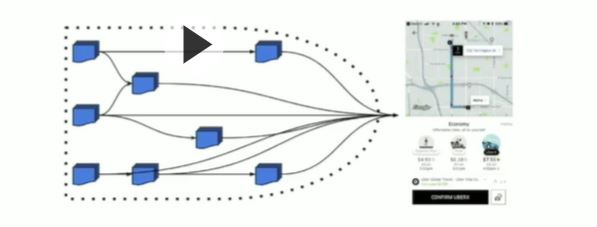

And in fact, quite complicated in connection with all these many micro-services. Now, Uber wants to capture the state of these micro-services and the state of the communication between micro-services with fairly refined granularity. And these are all-time series Uber needs to track for one reason or another. Certainly the level of the market, Uber are interested in all the markets Uber operates in. Uber offers several products for each of these markets. Uber has several up versions, and then there is the powerful combinatorics of geographic multipliers– all the cities Uber operate here, all the neighborhoods Uber operates here.

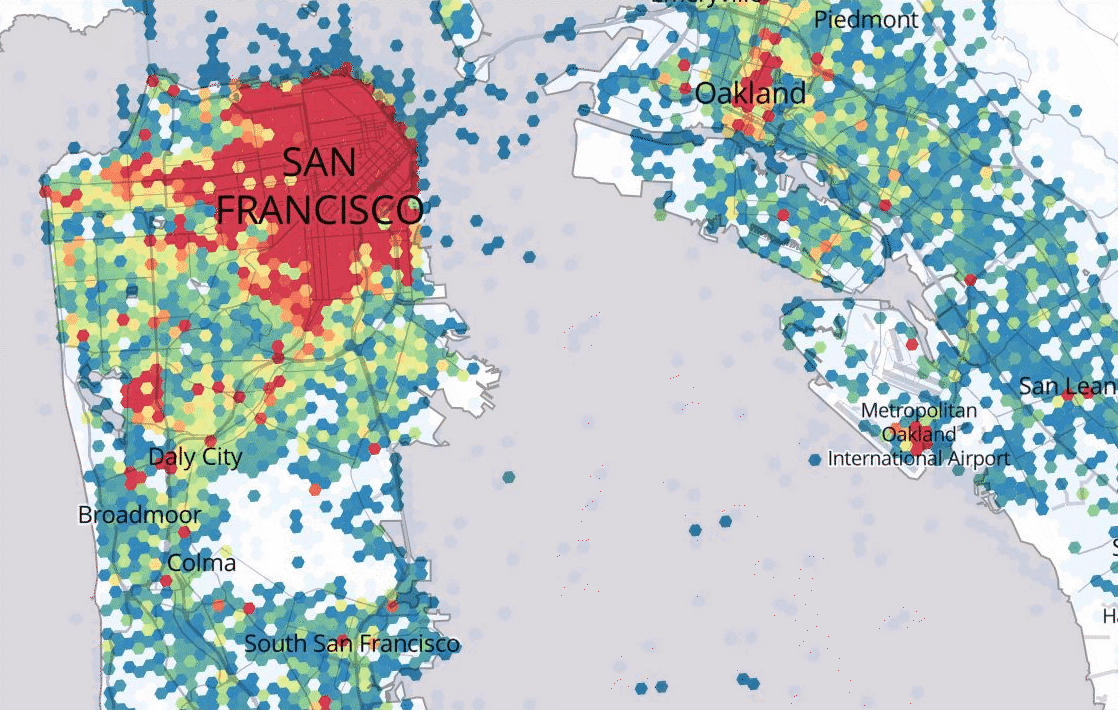

For instance, on the leftover here, you can see a picture that shows a snapshot of one particular market in some areas for one particular product, the domain UberX product, where you see the level of granularity– geographical granularity– Uber is interested in. And this is represented as a heat map that evolves in time, where red means many transactions, namely many trips occurring. Blue means fewer, and then a yellow-red is in between.

## Time series
When it comes to technical time-series, Uber also has a very powerful multiplier. There are very many micro-services, and there are communications between micro-services, which scales like the product, the square, of the number of micro-services. So in fact, at the latest tally, when Uber computes all the time series that Uber originate through these that Uber might want to keep track of, it ranges in the order of a billion, because of these remarkable multiplier effects. The edges represent API calls between micro-services. And this is just a corner of the space. It doesn’t represent the whole set. But just you get a sense of what is the scale.

So Uber has to deal with several compounded difficulties over here. The horizons of interesting forecasting are also quite varied. Sometimes Uber is interested in really short-term forecasts, almost real-time. Uber does that to price a property transaction in those markets. Uber does it for reliability purposes. If a time series is supposed to measure in some way the health of the system, Uber wants to know that the system is becoming unhealthy as soon as possible so that Uber can interfere before the problem expands. Uber is interested in the medium term, and that really means between a few hours all the way to a month or so, usually to find out the markets are in balance. If there is a big imbalance between supply and demand, Uber wants to know, because Uber has levers, for instance, incentives so Uber can pull to equilibrate the market, which is good all around. And then long-term, which means up to a couple of years ahead, largely for infrastructure where Uber wants to figure out what is the infrastructure demand projected to be so that Uber can make sure that the infrastructure supports Uber growth without necessary overspending. So lots of compound challenges. Perhaps I convinced you Uber has a high cardinality problem, lots of time series.

They are also very different from one another so that an intelligent system that takes in this time series, has to be able to deal with lots of different patterns.

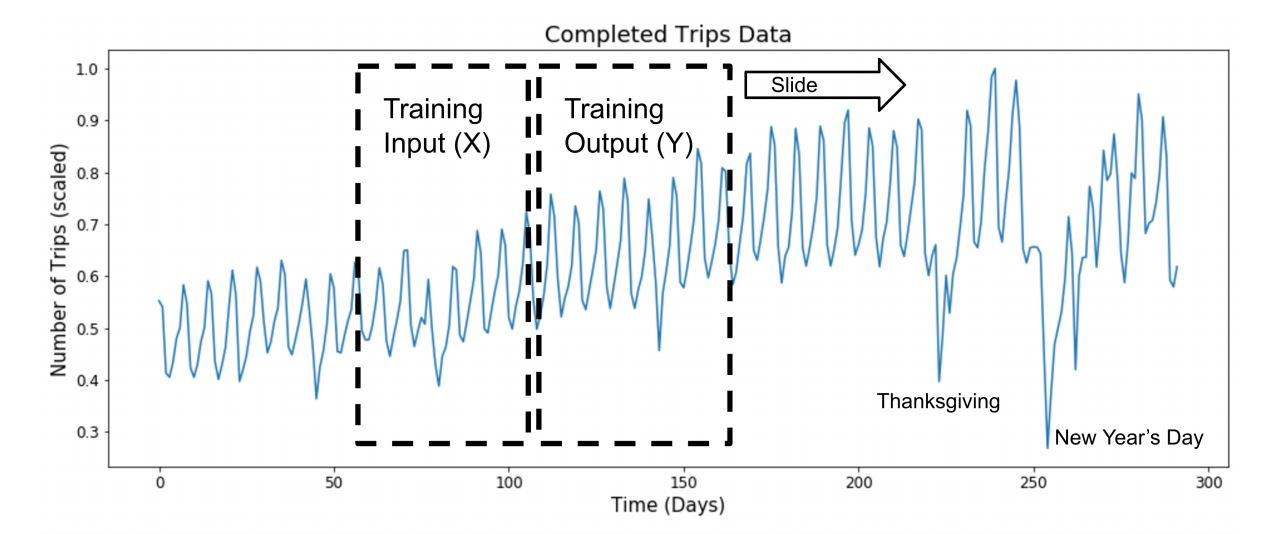

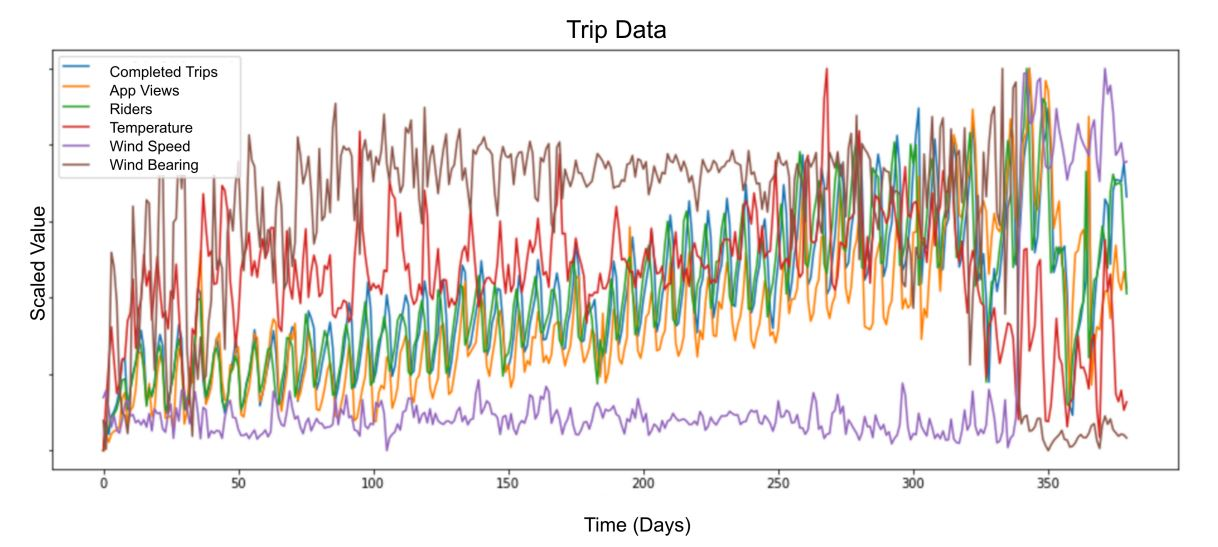

Sometimes Uber has to deal with a lack of information, either because Uber has a short time series in markets where Uber just started or because the time season maybe is long in itself, but it’s fairly sparse. This is, for instance, a technical time series that counts a certain number of events. And you see that oftentimes nothing happens. Largest stretches where it’s just 0, then you have one count, two counts, three counts, and so on. So these are all-time series that Uber has to deal with and forecast all of this larger variety of things.

## Classical Methods
Uber gets the time series, and they learn time series by time series, nothing across time series typically. And what you do there is that you decomposed your observable states of the time series in unobservable states. In order to do that, you have to have an opinion about the structure behind the time series, which you impose. The composition, for instance, a typical composition could be level, trained, and the periodic aspect, seasonality, which in general there is more than one.

Once you’ve done that, then you estimate this unobservable component by averaging appropriately historical values. And you do that typically through some kind of exponential smoothing, hence the name. Then the focus is relatively simple. You move the structure regression one step ahead at a time. You recombine them, and this is your forecast for the times series. Now, many methods such as in the Holt-Winters or ETS or even ARIMA can be cast in this context– belong to this classical methods family.

An example of such a composition here at the top, the completed trips in one particular location. That’s what the time series actually looks like. This is observable. And then you have the composition, in this case, run by the ETS, error trends seasonality model, which is of the classical methods family, where you have the completion into an overall level trained, how the time series is trending, and then the periodic seasonality at the bottom. There are many other such compositions that can be done, but the general idea is still there.

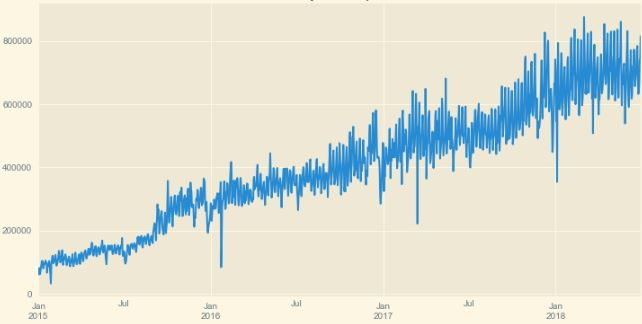

Now, these are statistical models. In fact, sometimes they referred to it like that. And the reason is that even though the structural equations give you a point estimate, typically you can treat this as stochastic processes with assumptions about the errors. And once you have done that, then you can focus not just on the point value but the whole distribution. And then you get prediction intervals forecasted.

## Machine learning Methods
There are basically four main milestones that I’ll touch on.

A relatively simple model, a generalized linear model.
Quantile random forest, a cousin of random forest. This is a more interesting model that can learn nonlinearities. 
Hybrid approach as Uber combines statistical and machine learning models, in this case specifically deep learning, which again is best in class.

## 1)Generalized linear model.
So it’s a very simple model. It cannot learn a nonlinearity. The nonlinear structure is imposed by the creator through a linking function. So basically, Uber says that the response variable is just a function to be specified of a linear combination of the features. So clearly, the emphasis on who would be on featurization of it there. This can be turned into a stochastic model, which allows you to do a density forecast, which is what Uber needs in any case. I think any serious forecaster should always provide also intervals, not just point forecasts. And you do that by having your opinion on the errors, the deviations between the response estimates and the actuals. And typically, people use Gaussian or Poisson error or you can generalize. Once you’ve done that, then you do get a density forecast. And you can also optimize, for instance, through maximum likelihood selection.

This is one of those medium-term forecasts when Uber looks maybe a couple of weeks ahead, and Uber tries and figure out if there is an imbalance in the markets by forecasting supply and demand and seeing if they match. So here, Uber train a model per city, which learns across all the neighborhoods in that city.

And I show this for a large cluster, meaning a large neighborhood versus a small neighborhood. And you see that the performance is very much on top of it, quite a bit, more so for the large cluster than for the small cluster, but nonetheless, this is the type of precision you can get. Now, this is an interesting point.

Even though this seems very precise already for most purposes, there is in fact a pretty direct impact on the bottom line for Uber, and therefore a pretty direct business impact to actually improving the forecast position, even a little bit, which makes Uber a good place to do this type of activity, because fancy data science is not done just for its own sake, but it has an impact on the business quite immediately. So Uber can take this as a start point in the narrative. Uber keeps track of how they can improve on this problem. Now, the emphasis, as I was saying, is clearly on featurization. Indeed, in this model, there’s very little else. But it is a common refrain. You will see it occurs throughout the older models Uber will look at.

If I want to know the time series is for what neighborhood of that city because maybe neighborhood can actually learn more from one another than farther away neighborhoods. And I want to know what hour of the day, what day of the week it is. Now, these are categorical features. So their first inclination would be to one-hot encode them. And indeed, Uber did that. And the model performed extremely poorly compared to statistical methods. It was only when Uber had that intuition that, instead of doing this, perhaps they could take some kind of fingerprint of these geo-temporal units where Uber looks at a geo-temporal unit, meaning the values that all the time series in a given neighborhood take over a certain window of time, which I represent here with the red box.

But I can show you what is the improvement, the relative improvement, and the GLM model, as I described, provides a 12.5% improvement, which is quite a bit, if you think of it, in terms of the error. And the metric of error here is MAPE, which I’m sure people in the forecasting community are familiar with. But for those who don’t know, think of it as the mean absolute percent error. And there is a way in the schema which is perhaps less important. So let’s not talk about that right now. So 12.5% is the first thing Uber can get over statistical models.

 

## 2) Quantile Random Forest
I’m sure you’re familiar with random forests. Perhaps you have not played with quantile random forest, which is a close cousin. Just to give you a sense of the general idea, it is very simple. So for the random forest, you start clearly with the decision trees. Think of them as extremely greedy optimizers for entropy. You always greedily optimize them node by node what is the right decision.

People use that and they realized they were powerful but also had quite a bit of variance. But they also realized that if you randomize the process and you consider a large collection of such trees, you obtain much less variance in your forecast. And then the idea there is that, of course, you aggregate the predictions of each individual tree, typically with some kind of aggregation fraction, typically the mean, and you get a single prediction for the forest. Now, quantile random forest just goes one step beyond. Instead of the mean, you consider all the predictions. You form distribution and out of that, you compute what are the quantiles, hence the name quantile random forest.

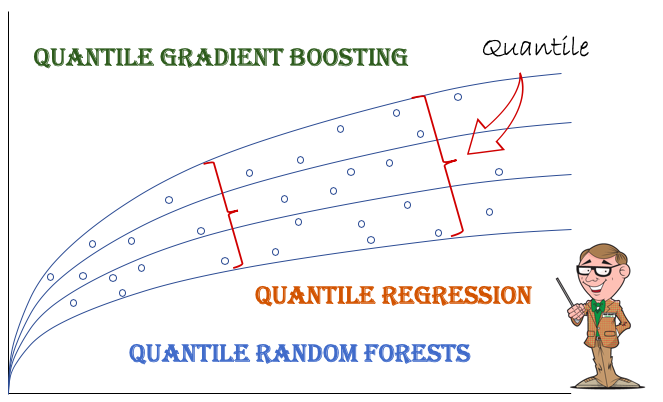

So this turns the random forest into a predictor for prediction intervals, which is again a requirement for our agenda. So then, this is a much more interesting model. It can learn nonlinearities instead of imposing them. Maybe it’s not obvious from everything I said, but yet again, the refrain that featurization is paramount and it is hard work, in this case, it’s there.

The thing is that quantile random forest has no sense of time whatsoever, which means that you have to, for instance, compare to recurrent neural networks, which have a sense of time. So you need to provide this sense of time through intelligent featurization, which is not simple, but you can do it. And it is still easier than, in our experience at least, than for neural networks, even though some of them have a sense of time.

The main reason it’s easier is that if there are categorical features or, in general, if there are features that value very much in the span, quantile random forest has no problem whatsoever with it, whereas for neural networks, if you want stochastic again to the center to optimize them properly, you have to be very careful to normalize and balance things. Quantile random forest has no problem. So by using this method, in a very quick time, mostly focusing on featurization, they were able to improve dramatically over GLM with the improvement of 22% compared to the baseline on the same problem. So I’m keeping a tally so you get a sense.

## 3) Deep  Learning – Neural Networks.
Now, this is a much more interesting model, of course. You know what neural networks are. So let’s not even talk about that. Let me mention, however, there is a variant of neural networks, of recurrent neural networks, which are especially suitable to times series forecast or, in general, in any prompts which have a sense of ordering.

For instance, natural language processing also is another use case there. Because they do have a sense of time, and this is accomplished by having an internal state that gets updated from one iteration to the other, which therefore allows them to keep memories. So they have a sense of the past. One type of recurrent neural network is long short term memory. It’s a particular cell. So where I say A there, there is in fact a cell inside with an internal structure. And the idea there, going back, is that they are able to retain a variable amount of past information in these apps a lot in optimization to avoid the problem of vanishing gradients. Specifically, what is true over here is that Uber has a cell-like that.

What this allows is that you can allow for a selective amount of memory, hence long and short term. And moreover, this is adaptive. From one iteration to the other, you can in fact change how much memory you retain. And this really helps with optimization. So LSTMs or other cells of this type are, in fact, the rule of the game typically when you want to use deep learning in the context of time series forecasting.

So what does the architecture look like? The architecture, typical architecture, is not as deep as people, for instance, used to computer visions have seen. Uber will see an improved architecture, which is more complicated than this, but this gives you the general idea. Uber basically has two hidden layers, on top of which you have another hidden layer, which is just a standard layer, two layers of LSTMs, and one standard layer, and then you have the output.

Notice that there are variations. You will see a few in the subsequent parts of the talk. But this is a general idea. So they’re considered shallower that you find in other fields. But the emphasis here, again, is that rather than optimizing on the architecture, you get to the bigger bang for the buck, so to speak, by actually doing good preprocessing in time series featurization.

Now, here, I emphasize the difference between row input and input, because instead of providing the time series just as it is, Uber actually does quite a bit of preprocessing, mostly to make sure that all the time series and all the features are normalized in a similar way. And this really helps for the optimization of the system. Now, Uber uses this type of architecture, variations from top of this, in a variety of contexts. Uber also uses a very short horizon for anomaly detection, especially for reliability purposes.

And then again, a type of architecture of this comes as an ingredient in the hybrid models I claim are best in class.

 

## 4) Hybrid Models
Uber spent maybe double the amount on improving deep learning models for this problem than Uber’s needs for quantile random forest, and they still over this amount of time were not able to beat the performance or quantile random forest. Now, I show you a couple of things. I show you a simple multilayered perceptual neural network architecture. And the reason I show you that is because this is the closest analog to quantile random forest and that it has no sense of time either. There is no internal state, just multilayer perception.

And the performance with similar preprocessing as quantile random forest is considerably disappointing, 12.5%, improvement, a better match for GLM. Now, where you add the sense of time like with LSTM, then that bumps you quite a bit. And so you get 18.8%, still less than what Uber obtained for quantile random forest. So now, is this the end of this final word? No, I don’t think it’s the final word absolutely. There’s quite a bit of work they are still doing on LSTMs. You can improve the performance.

You can play with different architecture and so on. But the one thing is that there’s not an immediate silver bullet. And they found that it is better to combine LSTMs with stochastic models if you really want to get good performance. So perhaps your time is better spent looking into these hybrid models, at least in our experience, than trying to refine the performance above. So this is pretty telling, especially because comparing the forest was put together relatively quickly and achieved pretty good results right away. Deep learning proved considerably harder.

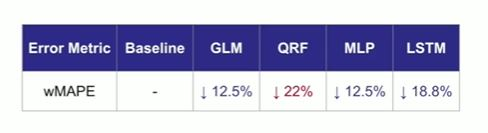

## Conclusion
How do you recover density forecasts when it comes to deep learning?

Now, density forecasts are paramount. You want to have prediction intervals, otherwise, you don’t know the precision of your forecast at all. And now neural networks, usually give you just a point forecast, and most people use them in that fashion. So what Uber did, in this case, is very simple. One of two approaches, one considerably more interesting than the other, but both fairly good. One is that instead of having the neural network generate a single number, you have them generate a collection of numbers, one per the point estimate and several for various quantiles of the distribution you are trying to predict.

## Other ways
The way that you push the neural network toward predicting a quantile of the distribution instead of the expected value is to use a loss, which is asymmetric, which penalizes over-forecasting more than under-forecasting or vice versa, depending on when you want a high yield of 50 or lower than 50 quantiles. So that’s the pin-ball loss represented graphically over there. That’s one loss that will do the job for you. You have to calibrate it.

One example of this hybrid model was a clear winner in the M4 Competition. Now, again, I don’t expect you to know about the M competitions if you’re not in the forecasting area, although if you are, you probably heard of them. The latest incarnation, the M4, was around this year not long ago. And so one of these models is a winner.

Now, to give you a sense, Rob Hyndman, which is a big name in the area of forecasting, said about the predecessor of the M4, the M3 Competition, there is a bit of a standard for times he is forecasting. He said the M3 data have continued to be used since 200 for testing new time series forecasting methods. In fact, unless a proposed forecasting method is competitive against the original M3 participating methods, it is difficult to get published in the International Journal of Forecasting.

## More deep learning applied in-depth

So this gives you the sense that this is a little bit of the standard you want to test your methods against if you want to see if they are viable. The M4 is the latest version, which happened not long ago. It includes about 100,000-time series, for which you know the historical values, the frequency, whether it’s yearly, quarterly, monthly, weekly, daily, hourly. And finally, just the general area. Some of them are in demographics, some in finance and industry, and so on. But you don’t know anything else. So it’s a tough, challenging problem because you don’t have much information about that. M stands for Makridakis, who is the professor who put together the first competition as well as participated in all the subsequent ones and ended.

### So then, what do I mean by hybrid models? 

These are models that combine. On the one hand, the traditional structural models I described at the beginning, the exponential moving family being a clear example, together with machine learning models, usually deep learning and so in particular in our versions. They are hierarchical in the sense that the parameters you have to train, are local and some are global. Local in the sense that they are by time series. They vary from time series to time series. Global in the sense that they are not variable by time series, but they are learned across time series.

Now, in our experience, the reason why neural networks don’t always perform as well as other methods are because they tend to average a little bit too much across the time series that are provided in training, which really means that perhaps in this hybrid model Uber has an opportunity to bring back a little bit of the specificity the neural networks have traveled to capture. And now there are two models I want to discuss, and I think in the interest of time, I’ll move on to the second one, the one that won the M4 Competition, and then I’ll go back to the event lift model if Uber have time, because I’m not sure otherwise I have time to cover all of this. So let’s talk about the M4 model. It is a hybrid of recurrent neural networks, the RLSTMs, and the one member of the exponentials moving family.

### How do I optimize hybrid models?

So now how do you go about optimizing these types of models? It’s not trivial anymore now, because you cannot just use stochastic gradient descent and optimize it once and for all. You go through e-books and so on and you update the weights until you get to stability. You can’t do that anymore, because some of the coefficients in my nomenclature alpha and gamma are time series by time series. So in order to perform an optimization of a model like that, you need dynamic computational graphs. In other words, the computational graph has to be dependent on the time series. It needs to be updated as you move from one-time series to the other. Now, this is provided by several frameworks. Uber did this in Dynet. Uber then, later on, was implemented in PyTorch. PyTorch is especially important to us because as a tool bearer, Uber has a team that created a library that leaves on top of PyTorch call Pyro which is especially good for doing basing optimization. So to have a version of this in PyTorch was important to us. And I think this is also supported by TensorFlow now, at least in some fashion. But I don’t know too much, because Uber hasn’t used that.

So you need dynamic computational graphs in order to do that. And this is all I can say for now about this particular model, which again, won by a significant margin, in some categories up to 30% compared to the next winner– to the second place model.

### What does Uber do?

What Uber does is that when a new time series comes in that Uber are not– to establish a baseline, Uber runs it against a stable of models. And then Uber tries to improve over that. So you know, when I was keeping a tally, there is a baseline that I did not indicate the actual number, because I don’t think I’m allowed to. But I just wanted to give you the relative improvement. That baseline is obtained by running a bunch of models against the time series of one on one. And then they are trying to improve on top of it. And these models include ETS, Holt-Winters, Holt-Winters with double seasonality, which are all ARIMA, ARIMA X, which are all members of what I call this exponential smoothing state parameter. Even though ARIMA is not constructed the way, it’s been shown that you can cast it as a member of this particular family with some choices. So those are included. The M profit has included that as well.

So when I say baseline, I give it the best-performing model among the large number. They are talking 10 or 15 of the exponentials moving family as well as profit.  So the answer is that these can perform– the machine-learning-based methods can outperform those methods. It really depends on the problem space.

Uber finds that if these three conditions are met, namely you have plenty of history, there’s little transfer learning you can do across time series. And there are not too many external regressors you might want to add, then it’s hard to beat those. I hope this gave you the general idea of Uber’s internal structure of forecasting.

## Uber’s Dynamic Pricing Model
Here’s a quick and easy guide to how Uber’s dynamic price model works, so you know why Uber prices are changing and what regular peak hours are the costs of Uber’s rise.

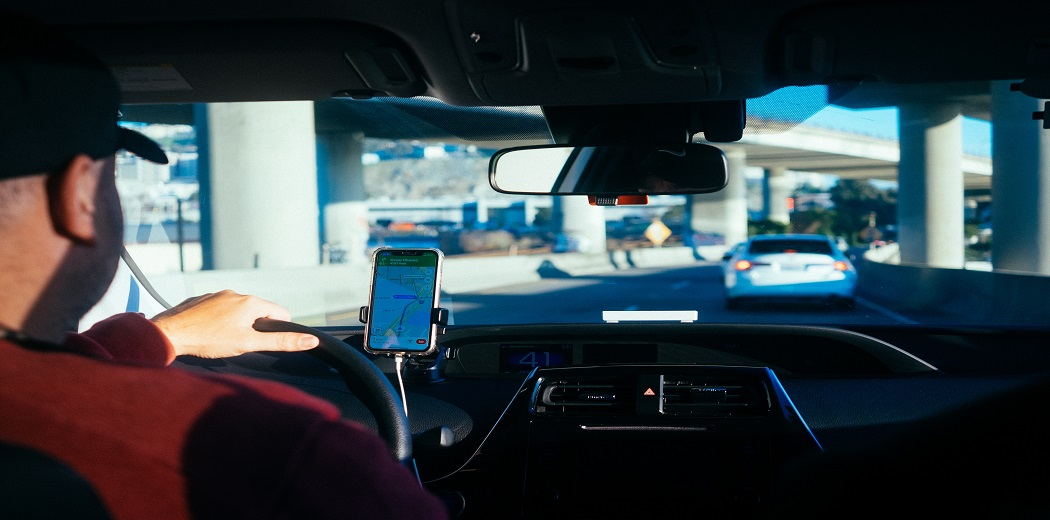

### How does Uber price work?
If you request a ride on Saturday night, you may find that the price is different from the cost of the same trip a few days earlier. That’s because of our dynamic pricing algorithm, which converts prices according to several variables, such as the time and distance of your route, traffic, and the current need of the driver. In some cases, this may mean a temporary increase in price during very busy times.

### Why are Uber rates changing?
As demand increases, Uber uses flexible costs to encourage more drivers to get on the road and help address a number of passenger requests. When we inform you of an increase in Uber fees, we also inform drivers. If you decide to proceed and request your ride, you will receive a warning in the app to make sure you know that ratings have changed.
Price range

When more drivers enter the road and board requests have been taken, the need will be more manageable and the fare should return to normal.
Uber Top Hours

If you’re a regular passenger, you’re probably already familiar with Uber’s peak times, when rising demand and prices are very likely. These include:
Friday and Saturday nights
After-work hour fast
Major events and celebrations
Strong prices help us to ensure that there are always enough drivers to handle all our travel requests, so you can ride faster and easier – whether you and your friends are taking this trip or staying up to you.

### Business Problem
Before you start managing and analyzing data, the first thing you should do is think about the PURPOSE. What it means is that you have to think about the reasons why you are going to do any analysis. If you are unsure about this, just start by asking questions about your story such as Where? What? How? Who? Which?

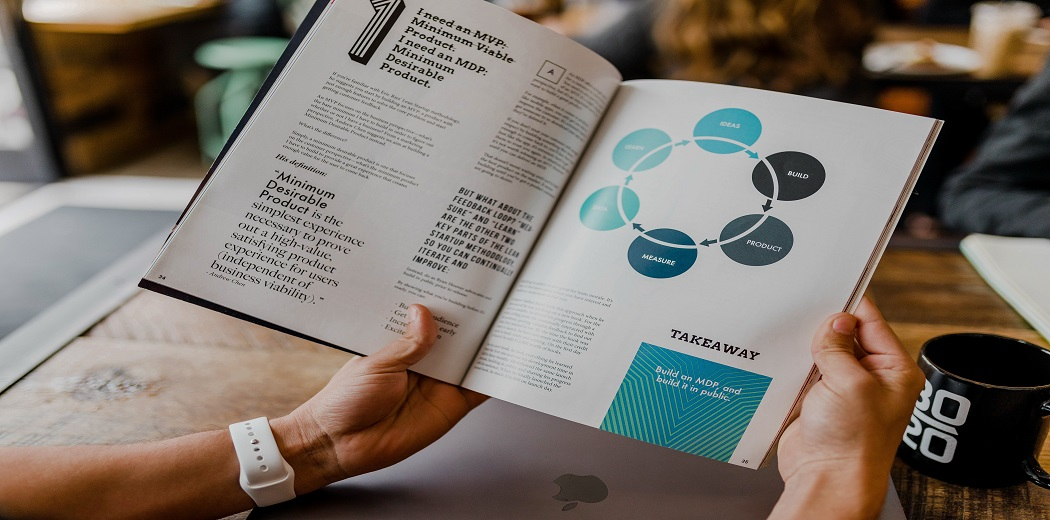

Depending on how much data you have and features, the analysis can go on and on. The following questions are useful to do our analysis:

a. How many times have I traveled in the past?

b. How many trips were completed and canceled?

c. Where did most of the layoffs take place?

d. What type of product is most often selected?

e. What a measure. fare, distance, amount, and time spent on the ride?

f. Which days of the week have the highest fare?

g. Which is the longest / shortest and most expensive / cheapest ride?

h. What is the average lead time before requesting a trip?

Data visualization is certainly one of the most important stages in Data Science processes. While simple, it can be a powerful tool for prioritizing data and business context, as well as determining the right treatment before creating machine learning models.

----------------------

## Let's do coding!

(Haun, 2019)
https://github.com/tylerhaun/uber-price-tracker

Uber prices vary based on supply and demand, and I wanted to predict what they would be to save time and money when using it. Sometimes I can wait 10 minutes and the price goes down by half, other times I end up waiting an hour with no change. So this project is meant to help with that by predicting the prices so I know how long I should wait to get one. Data-driven decisions would be the buzz word here.

## Overview
This has a few different components in it. ETL job which needs to be running all the time to collect data on uber prices and store it in a database, a frontend client to visualize the data, and a prediction program which can learn from the collected data and be able to output prices at future times.

The frontend graph is a simple d3 chart Haun found some code from online and improved it for this project. Haun added in a hover inspector similar to google’s graphs, where when you hover over a point on the graph, it tells you the x and y values at the y intersection. It is served using handlebars.js which injects the data from the database. Since the data was getting so large, Haun had to add in date and type filters, and dynamic downsampling of the data using the modulus operator.

## Machine Learning Prediction
In machine learning, picking the right features is an extremely important piece to getting useful results. Features are just properties to be measured. Some features that might be useful in this time series analysis:

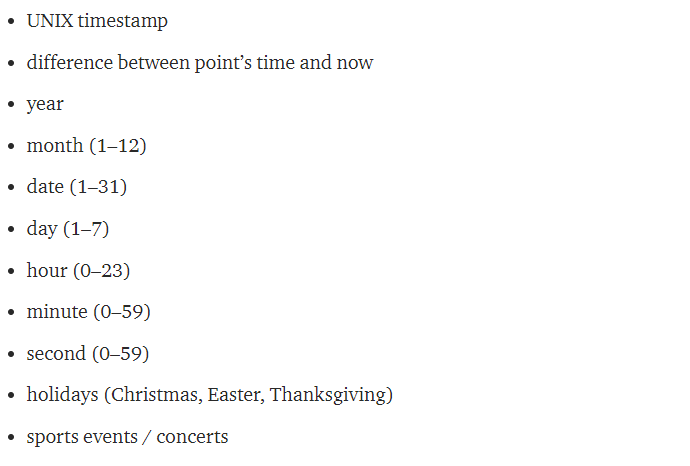

I ended up using month, date, weekday, hour, and minute since they seemed like the most important, as seen in this code snippet:

In [ ]:
def int_to_unary(int, range):
    size = (range[1] - range[0]) + 1
    ret = [0] * size
    ret[int - range[0]] = 1
    return ret

def transform_time_to_inputs(time):
    inputs = np.concatenate([
        int_to_unary(time.month, [1,12]),
        int_to_unary(time.day, [1,31]),
        int_to_unary(time.weekday(), [0,6]),
        int_to_unary(time.hour, [0, 23]),
        int_to_unary(time.minute, [0,59]),
    ])

This outputs an array of length 134 with all binary. For example, the month part of it gets transformed from 1–12 to a list of booleans. An example of that is January (month #1) -> [1,0,0,0,0,0,0,0,0,0,0,0,0], February (month #2) -> [0,1,0,0,0,0,0,0,0,0,0,0] etc. I believed this method would be best for the network since it is the least ambiguous, compared to using the value of the month (1–12) as one input.

Then to train the network, you just need to transform the time into this array and train it on the value associated with it.



In [ ]:
def map_estimates_to_input(estimate):
  time = estimate[3]
  time = parser.parse(time)
  inputs = transform_time_to_inputs(time)
  return inputs
inputs = np.array(list(map(map_estimates_to_input, estimates)))

For neural networks (at least the ones I’ve seen and used), all inputs and outputs are values between 0 and 1. So I had to map the range of output values to 0–1. I made a linear scaler class to do so, which also has an inverse which is needed after the network gets activated in inputs to get the price. I chose 18–30 since that encompassed all of the possible prices I have seen so far. So 18->0, 30->1, 14->0.5, etc.

In [ ]:
scaler = LinearScaler([18,30], [0,1])
    
def map_estimates_to_output(estimate):
    scaled = scaler.scale(estimate[2]) # price
    return scaled
outputs = np.array(list(map(map_estimates_to_output, estimates)))

## Training the Model

In [ ]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

num_inputs = 134
model = Sequential()
model.add(Dense(num_inputs * 2, input_dim=num_inputs, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

stochastic_gradient_descent = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=stochastic_gradient_descent)

model.fit(inputs, outputs, batch_size=10, epochs=25, verbose=1)

Training the model took a couple iterations of playing with the values until it started looking right. The model has 3 layers. One input with 134 nodes, one hidden layer with 2*134=268 nodes, and one output layer with 1 node, representing the normalized price. The 134 comes from the transform time to inputs function from before and should be changed if that function changes.

## Creating the prediction data
Creating the prediction data just requires a list of dates whose values you want, running those dates through the trained model, then scaling the value back to a price.

To create the prediction times, I found the pandas date_range function which was useful. It gives a big list of dates to run against the trained model. Then map those dates to the boolean input lists using the same transformation function used to train the model, run the inputs through the neural network, map the data to fit the fare_estimate table columns, and save it in the database.

In [ ]:
now = now_utc_offset()

date_range = pandas.date_range(now, now + datetime.timedelta(days=5), freq="1min")
inputs = []
for date in date_range:
    inputs.append(transform_time_to_inputs(date))
inputs = np.array(inputs)
predictions = model.predict(inputs)

fare_estimates = []
now = now_utc_offset()
for i in range(len(date_range)):
    ts = date_range[i]
    time = ts.to_pydatetime()
    value = round(scaler.inverse(predictions[i][0]), 2)
    fare_estimate = {
        "type": "Pool",
        "value": value,
        "time": time,
        "predicted": 1,
        "createdAt": now,
        "updatedAt": now
    }
    fare_estimates.append(fare_estimate)

fare_estimates_controller.insert(fare_estimates)

## Result:
When playing around with the model training config, it gave some pretty believable looking results. Everything after the dotted line was predicted using the model, which I only ran for a couple minutes.

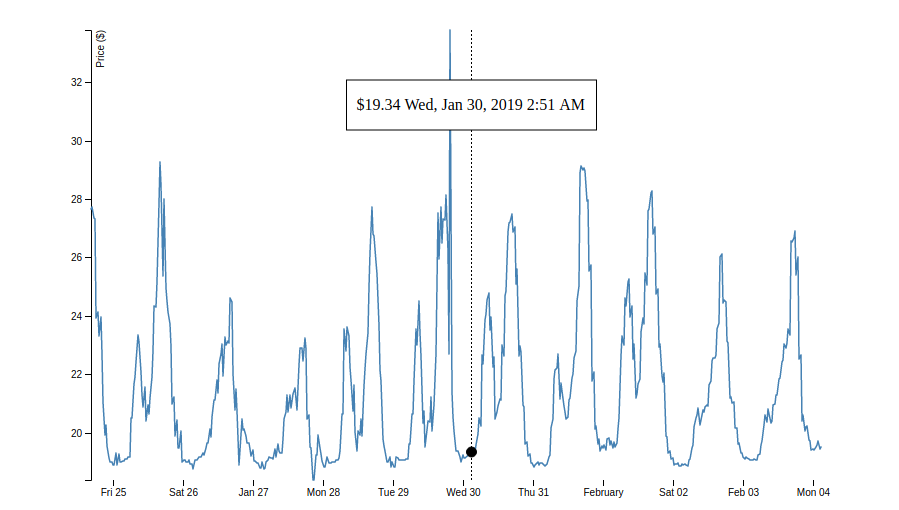

## Takeaways / Lessons:

### Flaws in the visualization of data:
As the data grows, visualizing it becomes more and more difficult. Using downsampling is simple but potentially removes important features from data. Averaging would be the same. Other types of graphs may improve it, such as candlestick chart or better interactivity.

### Downsides of SQLite:
While SQLite is a simple way to store data and works great for a number of projects I have done, I started to run into some issues with it here. I had 2 different programs trying to access it at once which was causing lock errors. When the prediction job was running and saving the data into the database which took a long time (over a minute in some cases) the frontend application was broken cause the database was completely locked up during that time. I’ve never run into that issue before with a normal database (MySQL, Postgres, MongoDB) so I’m assuming it is a SQLite thing.

Also, I hit some issues with it using SQLAlchemy when trying to do a bulk insert. Apparently, it doesn’t support bulk inserting, which required me to insert one line at a time with thousands of records which is why it was taking so long to insert. I read that you can do transactional inserts which speed things up but I didn’t have the time to actually do it.

### Timing:
I always like to measure and examine the time it takes to complete projects in order to optimize it in the future. As the cliche goes, time is money, so the faster I can complete projects, the more money I can help my company make.

ETL job ~ 2 hours

D3 graph ~ 5 hours

Nodejs neural network ~ 15 hours

python neural network ~ 18 hours

The tasks I already knew how to do well like databases, models, endpoints, APIs went very quickly, as seen with the ETL job.

With D3, I don’t have much experience with it so a big portion of that time was spent learning and experimenting until I got things working.

The node.js neural network was a big portion learning neural networks, and another big portion waiting for it to run since node.js is apparently very slow with it (probably why you don’t see people using node.js for machine learning much)

Then the python was giving my many issues and making me very agitated. I spent a lot of time trying to insert data into the SQLite database. I started by using the normal sqlite3 module and constructing the queries manually, but I wanted something more robust so I started using ORMs like peewee and SQLAlchemy. I already had the table schemas created and wanted something that could load the models from the table. Peewee wanted me to run a script against the database to create files with the models in it, which is stupid (actually kinda cool, but not what I wanted). But SQLAlchemy allowed me to autoload the schemas from the table which worked fairly nicely, so I went with that.

And I spent another big part of the time trying to get dates to work. I’ve only ever had problems when using python’s datetime module. It comes nowhere close to comparing to moment.js when it comes to usability, ease, and functionality. Datetime doesn’t have timezones build into it, so you have to use pytz to set it. And since sqlite3 uses all UTC time, I had to create a datetime, add the timezone, then change to UTC.

In [ ]:
def now_utc_offset():
    return pytz.timezone("America/Los_Angeles").localize(datetime.datetime.now()).astimezone(pytz.utc)

And all this took me hours to figure out what was going on. Maybe python is too difficult, or maybe using javascript has made me soft.

And another issue I had that took me a while to figure out is SQLAlchemy not saving timezone offset when I insert something. It was a simple fix, by using SQLAlchemy to construct the statement, then passing the data in myself.

In [ ]:
sql = self.table.insert().values(data)
result = self.engine.execute(str(sql), **data)

So in the future, I will start off with SQLAlchemy since it seems like the most flexible option. I can build queries, edit then execute them myself. And it can grab the table structure from the database which was super useful.

## Python vs JavaScript
JavaScript is still #1 to me, but python is by far superior when it comes to big data. Node.js took a few orders of magnitude longer to train the models than python and got worse results. But getting python to work properly is a headache. It might be from my inexperience with it, but javascript seems so much simpler and intuitive, plus has really nice tools like the chrome dev tools inspector.

I long for the day where JavaScript can do data science, but until then, python it is.

## Conclusion:
There is a lot of hype around machine learning and AI in the media at the moment and I feel most of it is just marketing, as seen with many of the big companies like Google and their AI that can detect videos of cats. But there are definitely some uses for it. This project used it to allow me to know future prices of Ubers which can save me money and allows me to make more informed decisions. I can see this concept being extended to many different uses and industries, helping businesses grow and giving them an advantage over their competitors.

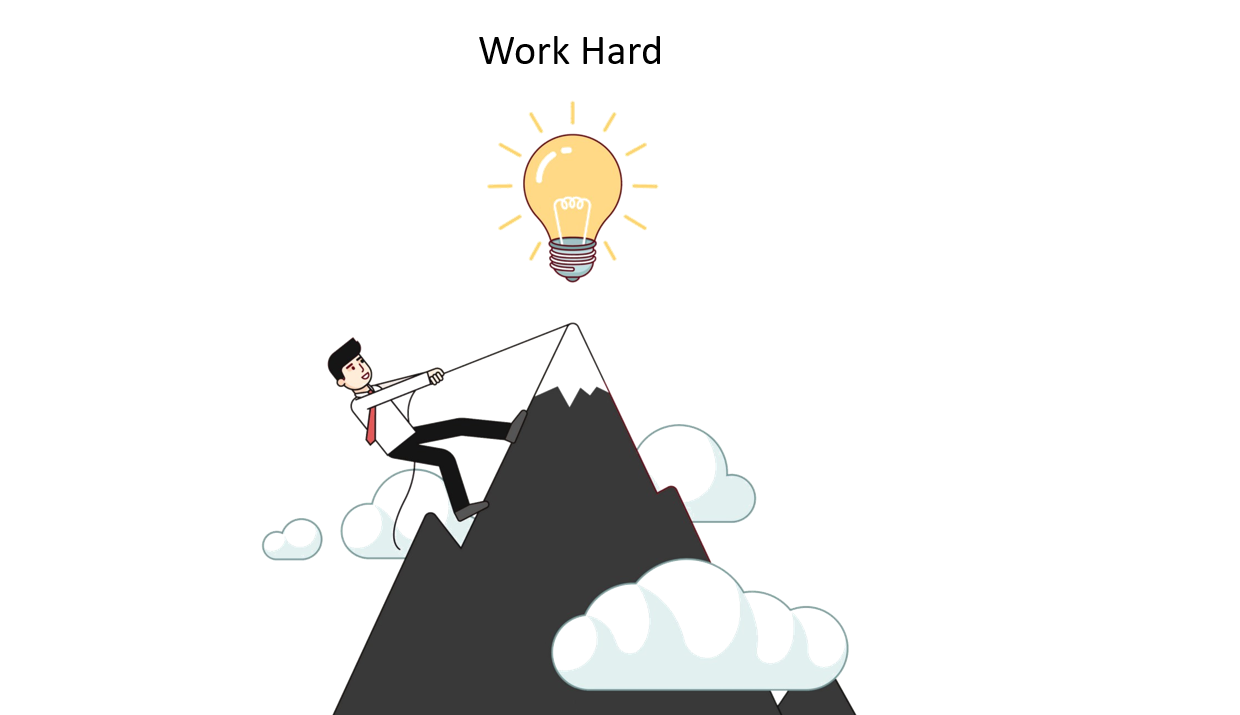

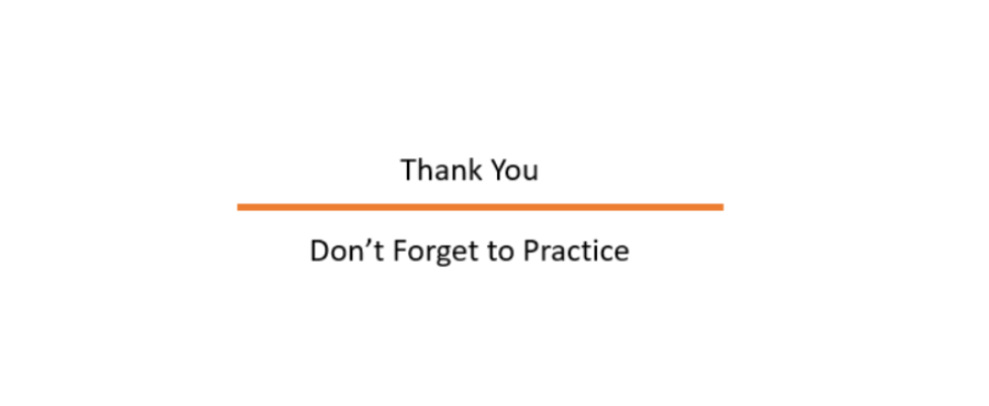

## Seung Jun Choi in Urban Information Lab
## End to End: Uber's Data Analysis

## Learning Objectives
### 1. Understand Uber's ML Strategy
### 2. Be Familiar with Predictive Modelling on Uber Pickups
### 3. Understand Exploratory Data Analysis Strategies for Uber trips

(Santosh, 2021) https://www.analyticsvidhya.com/blog/2021/10/end-to-end-predictive-analysis-on-ubers-data/

## Introduction
Uber is an international company located in 69 countries and around 900 cities around the world. Lyft, on the other hand, operates in approximately 644 cities in the US and 12 cities in Canada alone. However, in the US, it is the second-largest passenger company with a market share of 31%.

From booking a taxi to paying a bill, both services have similar features. But there are some exceptions when the two passenger services reach the neck. The same goes for prices, especially Uber’s “surge” and “Prime Time” in Lyft. There are certain limitations that depend on where service providers are classified.

Many articles focus on algorithm/model learning, data purification, feature extraction, and fail to define the purpose of the model. Understanding the business model can help identify challenges that can be solved using analytics and scientific data. In this article, we go through the Uber Model, which provides a framework for end-to-end prediction analytics of Uber data prediction sources.

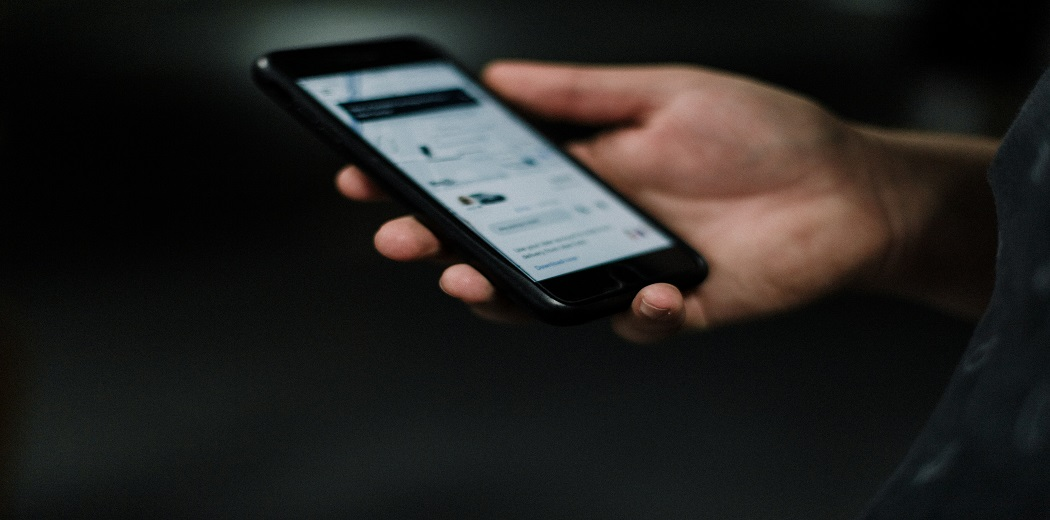

Uber’s biggest competition in NYC is none other than yellow cabs, or taxis. The basic cost of these yellow cables is $ 2.5, with an additional $ 0.5 for each mile traveled. In addition, no increase in price added to yellow cabs, which seems to make yellow cabs more economically friendly than the basic UberX. However, an additional tax is often added to the taxi bill because of rush hours in the evening and in the morning. However, apart from the rising price (which can be unreasonably high at times), taxis appear to be the best option during rush hour, traffic jams, or other extreme situations that could lead to higher prices on Uber. Despite Uber’s rising price, the fact that Uber still retains a visible stock market in NYC deserves further investigation of how the price hike works in real-time real estate.

### Uber’s Machine Learning Model 

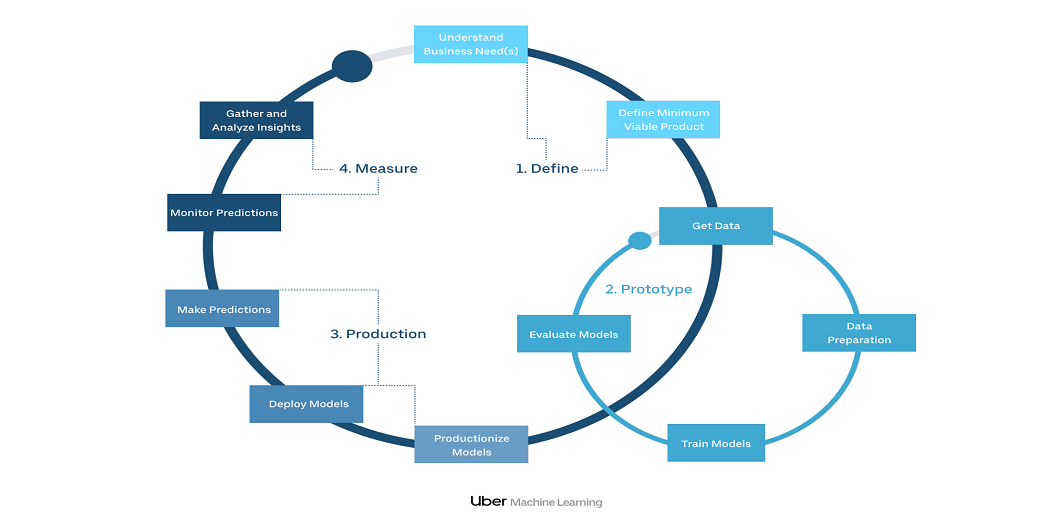

Workflow of ML learning project. Defining a problem, creating a solution, producing a solution, and measuring the impact of the solution are fundamental workflows. Barriers to workflow represent the many repetitions of the feedback collection required to create a solution and complete a project.
Michelangelo’s “zero-to-one speed” or “value-to-one speed” is crucial to how ML spreads to Uber. In new applications, we focus on reducing barriers to entry by streamlining the workflow of people with different skills and having a consistent flow to achieve a basic model and work with good diversity.

For existing projects, we look at the speed of iteration, which shows how data scientists can quickly and get feedback on their new models or features in offline testing or online testing.

A few principles have proven to be very helpful in empowering teams to develop faster:

Solve data problems so that data scientists are not needed.

Dealing with data access, integration, feature management, and plumbing can be time-consuming for a data expert. Michelangelo’s feature shop and feature pipes are essential in solving a pile of data experts in the head.

Change or provide powerful tools to speed up the normal flow.

Make the delivery process faster and more magical.

Michelangelo hides the details of deploying and monitoring models and data pipelines in production after a single click on the UI.

Let the user use their favorite tools with small cruft – “Go to the customer”.

Michelangelo allows for the development of collaborations in Python, textbooks, CLIs, and includes production UI to manage production programs and records.

Enable interaction and reuse.

Also, Michelangelo’s feature shop is important in enabling teams to reuse key predictive features that have already been identified and developed by other teams.

Guide the user through organized workflows.

## End-to-end workflow
In the beginning, we saw that a successful ML in a big company like Uber needs more than just training good models – you need strong, awesome support throughout the workflow. We found that the same workflow applies to many different situations, including traditional ML and in-depth learning; surveillance, unsupervised, and under surveillance; online learning; batches, online, and mobile distribution; and time-series predictions. It does not mean that one tool provides everything (although this is how we did it) but it is important to have an integrated set of tools that can handle all the steps of the workflow.

1. Define
Defining a business need is an important part of a business known as business analysis. This includes understanding and identifying the purpose of the organization while defining the direction used. In addition, you should take into account any relevant concerns regarding company success, problems, or challenges.

2. Prototype
The users can train models from our web UI or from Python using our Data Science Workbench (DSW). At DSW, we support extensive deploying training of in-depth learning models in GPU clusters, tree models, and lines in CPU clusters, and in-level training on a wide variety of models using a wide range of Python tools available.Finding the right combination of data, algorithms, and hyperparameters is a process of testing and self-replication. Going through this process quickly and effectively requires the automation of all tests and results.

3. Production
Once the working model has been trained, it is important that the model builder is able to move the model to the storage or production area. In Michelangelo, users can submit models through our web UI for convenience or through our integration API with external automation tools. Deployed model is used to make predictions.

4. Measure
Models are trained and initially tested against historical data. This means that users may not know that the model would work well in the past. But once you have used the model and used it to make predictions on new data, it is often difficult to make sure it is still working properly. Models can degrade over time because the world is constantly changing.

1. Customer Feedback
2. Customer Sentiments
3. Side Company Data
4. Situation Analysis Requires collecting learning information for making Uber more effective and improve in the next update.

Requires collecting learning information for making Uber more effective and improve in the next update.

## Scaling Machine Learning at Uber

Data scientists, our use of tools makes it easier to create and produce on the side of building and shipping ML systems, enabling them to manage their work ultimately. For developers, Uber’s ML tool simplifies data science (engineering aspect, modeling, testing, etc.) after these programs, making it easier for them to train high-quality models without the need for a data scientist. Finally, for the most experienced engineering teams forming special ML programs, we provide Michelangelo’s ML infrastructure components for customization and workflow.
Successfully measuring ML at a company like Uber requires much more than just the right technology – rather than the critical considerations of process planning and processing as well. In this section, we look at critical aspects of success across all three pillars: structure, process, and technology.

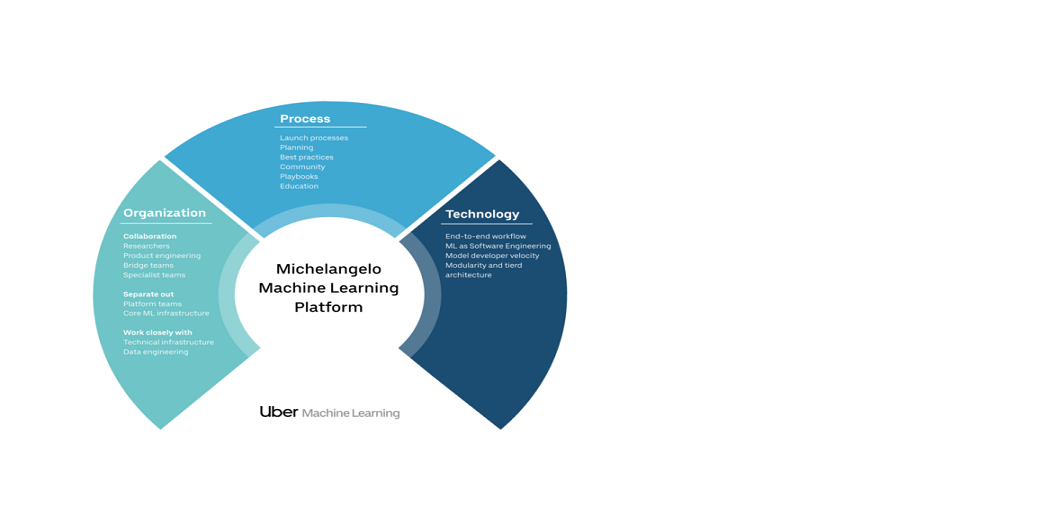

## Organization
The very diverse needs of ML problems and limited resources make organizational formation very important – and challenging – in machine learning. While some Uber ML projects are run by teams of many ML engineers and data scientists, others are run by teams with little technical knowledge. Similarly, some problems can be solved with novices with widely available out-of-the-box algorithms, while other problems require expert investigation of advanced techniques (and they often do not have known solutions).

## Process
As Uber ML’s operations mature, many processes have proven to be useful in the production and efficiency of our teams. Sharing best ML practices (e.g., data editing methods, testing, and post-management) and implementing well-structured processes (e.g., implementing reviews) are important ways to guide teams and avoid duplicating others ’mistakes. Internally focused community-building efforts and transparent planning processes involve and align ML groups under common goals.

## Technology
There is a lot of detail to find the right side of the technology for any ML system. At Uber, we have identified the following high-end areas as the most important:
### End-to-end workflow:
ML is more than just training models; you need support for all ML workflow: manage data, train models, check models, deploy models and make predictions, and look for guesses.

### ML as software engineering:
We found it important to draw analogies between ML development and software development, and then use patterns from software development tools and methods to get back to our ML functionality.

### Model Developer Speed:
The development of a machine learning model is a very repetitive process – new methods and advanced models come from many experiments. Because of this, the speed of the model engineers is very important.

### Modularity and tiered architecture:
Providing end-to-end workflow is important in managing the most common causes of ML use, but to deal with rare and very special cases, it is important to have the first things that can be integrated in a directed way.

# Let's do coding!

The day-to-day effect of rising prices varies depending on the location and pair of the Origin-Destination (OD pair) of the Uber trip: at accommodations/train stations, daylight hours can affect the rising price; for theaters, the hour of the important or famous play will affect the prices; finally, attractively, the price hike may be affected by certain holidays, which will increase the number of guests and perhaps even the prices; Finally, at airports, the price of escalation will be affected by the number of periodic flights and certain weather conditions, which could prevent more flights to land and land.

The weather is likely to have a significant impact on the rise in prices of Uber fares and airports as a starting point, as departure and accommodation of aircraft depending on the weather at that time. Different weather conditions will certainly affect the price increase in different ways and at different levels: we assume that weather conditions such as clouds or clearness do not have the same effect on inflation prices as weather conditions such as snow or fog. As for the day of the week, one thing that really matters is to distinguish between weekends and weekends: people often engage in different activities, go to different places, and maintain a different way of traveling during weekends and weekends. With forecasting in mind, we can now, by analyzing marine information capacity and developing graphs and formulas, investigate whether we have an impact and whether that increases their impact on Uber passenger fares in New York City.

Data: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city

Or you can use your own Uber dataset: https://auth.uber.com/login/?breeze_local_zone=phx5&next_url=https%3A%2F%2Fmyprivacy.uber.com%2Fprivacy%2Fexploreyourdata%2Fdownload&state=fdRNJAka9CPM_XiOMqNAsQ0kZwQ95R4W3Ob2n5jttPw%3D

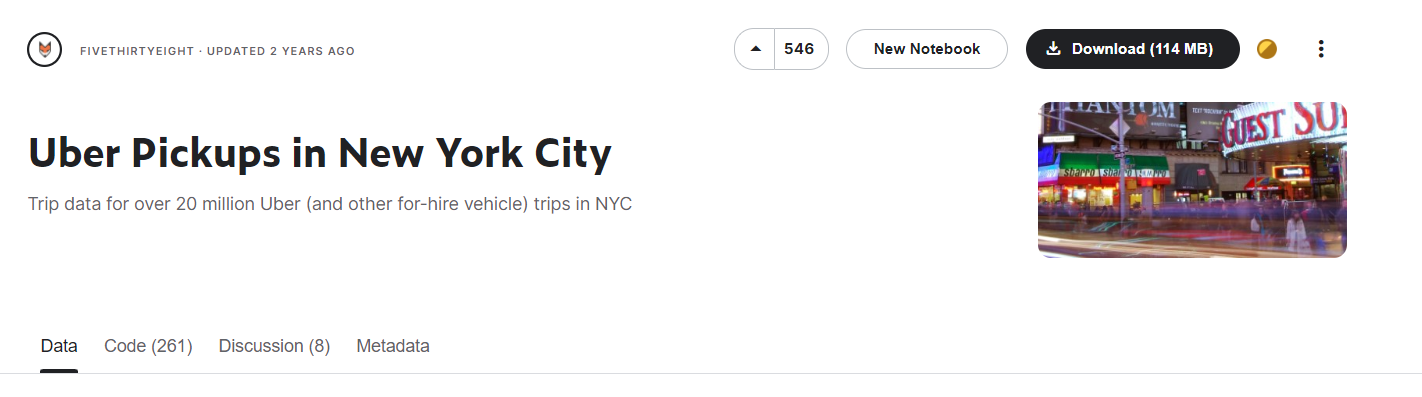

In [ ]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
rides.info()

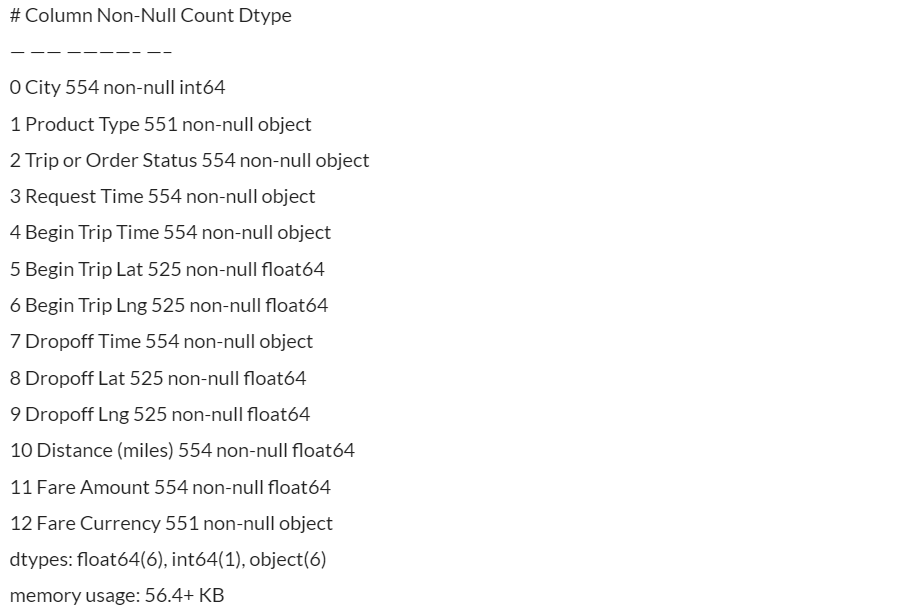

## Data Cleaning:
While analyzing the first column of the division, I clearly saw that more work was needed, because I could find different values ​​referring to the same category. After that, I summarized the first 15 paragraphs out of 5.

In [ ]:
# Checking categories in product_type column
print(rides.product_type.value_counts())
# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}
# New categories replacement
rides['product_type'].replace(product_mapping, inplace=True)
# Checking new categories in product_type column
print(rides.product_type.value_counts())

Since most of these reviews are only around Uber rides, I have removed the UberEATS records from my database.

In [ ]:
rides = rides[rides.product_type!='UberEATS Marketplace']

The days tend to greatly increase your analytical ability because you can divide them into different parts and produce insights that come in different ways. As shown earlier, our feature days are of object data types, so we need to convert them into a data time format.

In [ ]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta
# Function to convert features to datetime
def date_convertion(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df
# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

Now, let’s split the feature into different parts of the date. I did it just for because I think all the rides were completed on the same day (believe me, I’m looking forward to that !: D).

In [ ]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

## Feature Engineering:
Based on the features of and I have created a new feature called, which will help us understand how much it costs per kilometer.

In [ ]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

Delta time between and will now allow for how much time (in minutes) I usually wait for Uber cars to reach my destination. In this case, it is calculated on the basis of minutes.

In [ ]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

Similarly, the delta time between and will now allow for how much time (in minutes) is spent on each trip.

In [ ]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

Since features on Driver_Cancelled and Driver_Cancelled records will not be useful in my analysis, I set them as useless values ​​to clear my database a bit.

In [ ]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

## Data Analysis:
In order to better organize my analysis, I will create an additional data-name, deleting all trips with CANCER and DRIVER_CANCELED, as they should not be considered in some queries.

In [ ]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')]

### a. How many times have I traveled in the past?
444 trips completed from Apr’16 to Jan’21. If we do not think about 2016 and 2021 (not full years), we can clearly see that from 2017 to 2019 mid-year passengers are 124, and that there is a significant decrease from 2019 to 2020 (-51%). This is easily explained by the outbreak of COVID.
Uber rides made some changes to gain the trust of their customer back after having a tough time in covid, changing the capacity, safety precautions, plastic sheets between driver and passenger, temperature check, etc.

In [ ]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

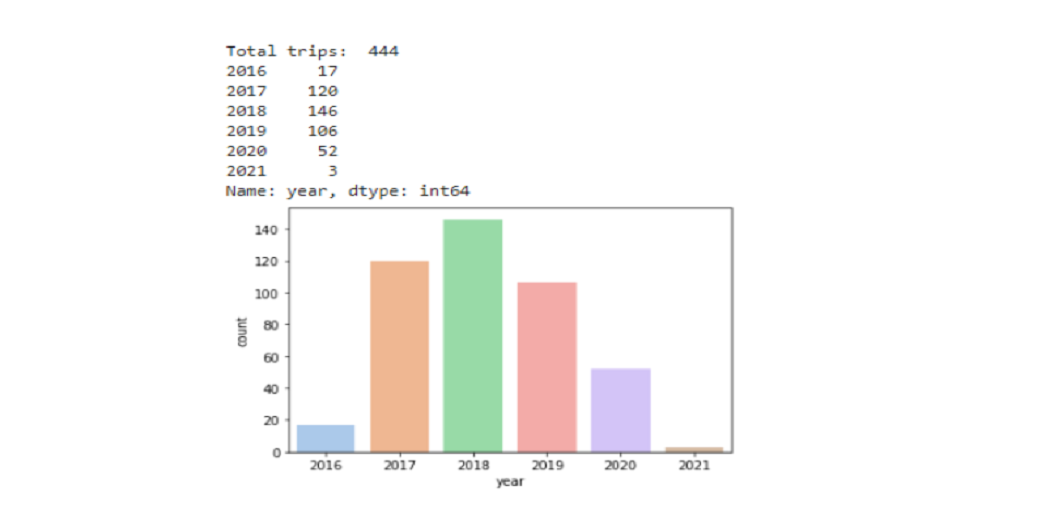

### b. How many trips were completed or canceled?
If we look at the barriers set out below, we see that with the exception of 2015 and 2021 (due to low travel volume), 2020 has the highest cancellation record. This could be an alarming indicator, given the negative impact on businesses after the Covid outbreak. Overall, the cancellation rate was 17.9% (given the cancellation of RIDERS and DRIVERS).

In [ ]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))
#sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='coolwarm');
rides.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

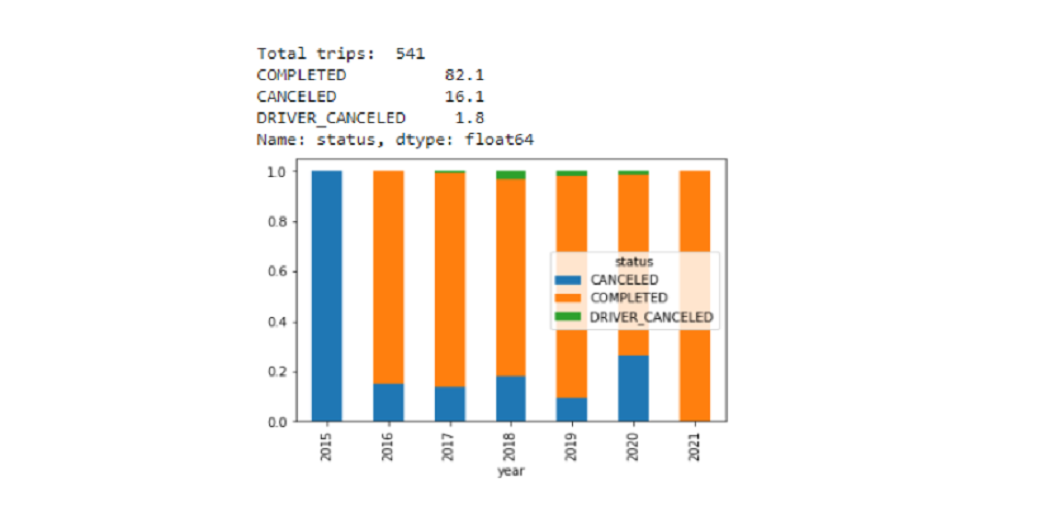

Covid affected all kinds of services as discussed above Uber made changes in their services. High prices also, affect the cancellation of service so, they should lower their prices in such conditions.

### c. Where did most of the layoffs take place?
The next heatmap with power shows the most visited areas in all hues and sizes. This could be important information for Uber to adjust prices and increase demand in certain regions and include time-consuming data to track user behavior.

In [ ]:
import folium

In [ ]:
from folium import plugins
coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

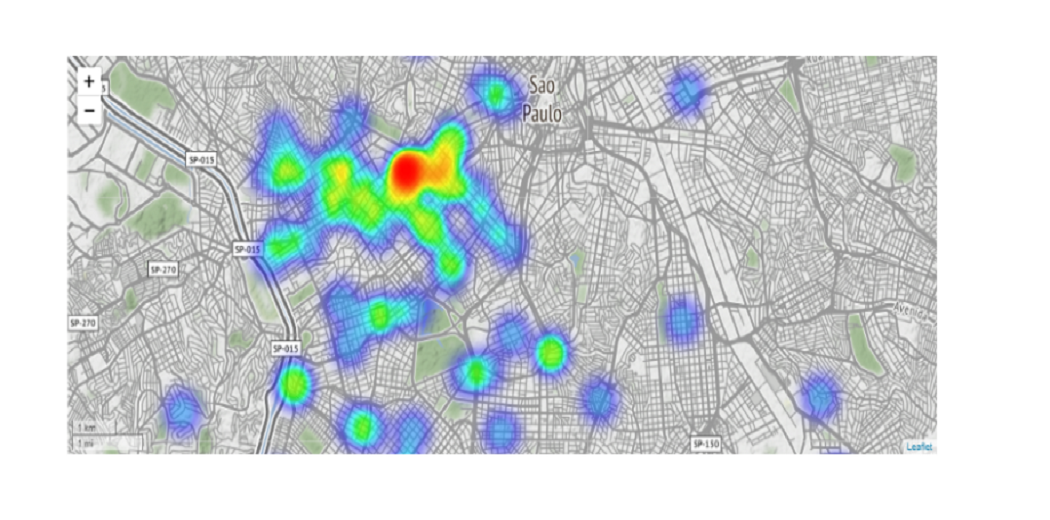

The above heatmap shows the red is the most in-demand region for Uber cabs followed by the green region. Uber should increase the number of cabs in these regions to increase customer satisfaction and revenue.

### d. What type of product is most often selected?
UberX is the preferred product type with a frequency of 90.3%. So I would say that I am the type of user who usually looks for affordable prices.

In [ ]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts().plot(kind='bar');

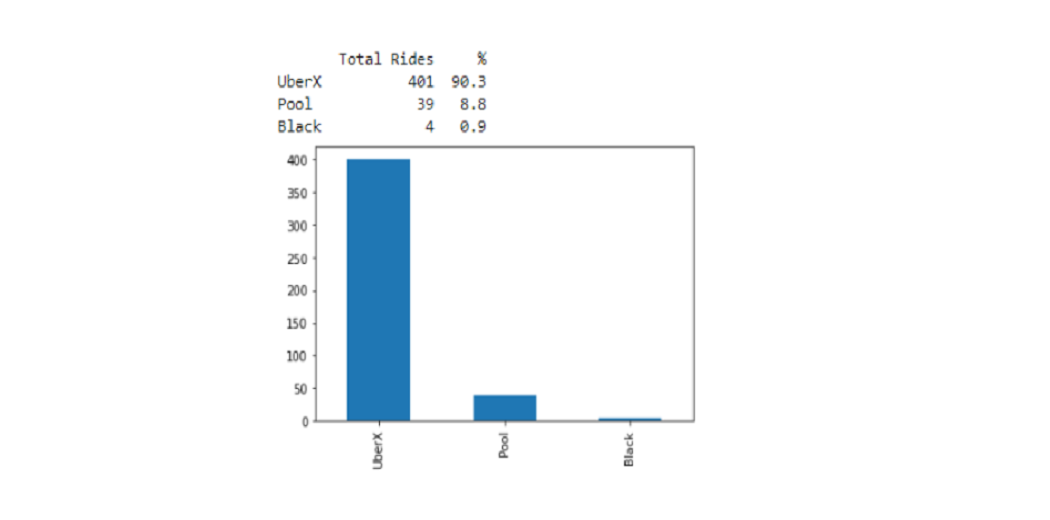

Since not many people travel through Pool, Black they should increase the UberX rides to gain profit. As it is more affordable than others.

### e. How much is the fare, distance, amount, and time spent on the ride?
Considering the whole trip, the average amount spent on the trip is 19.2 BRL, subtracting approx. 8.1 km. Therefore, if we quickly estimate how much I will spend per year making daily trips we will have: 365 days * two trips * 19.2 BRL / fare = 14,016 BRL / year
And on average, Used almost. 2.4 BRL / km and 21.4 minutes per trip.

In [ ]:
print('Avg. fare:', round(completed_rides.fare_amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.fare_amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

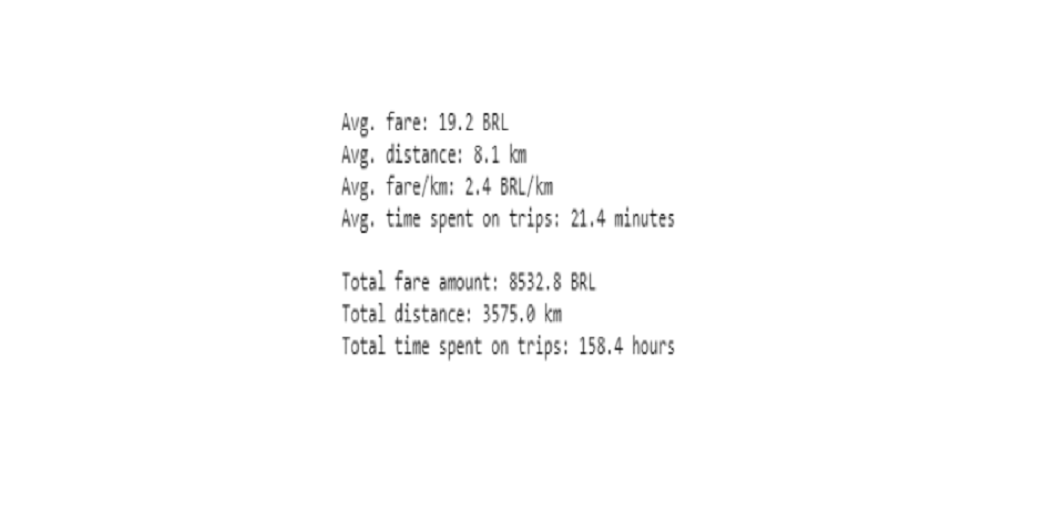

Uber can lead offers on rides during festival seasons to attract customers which might take long-distance rides.

### f. Which days of the week have the highest number of rides per kilometer?
According to the chart below, we see that Monday, Wednesday, Friday, and Sunday were the most expensive days of the week. Therefore, it allows us to better understand the weekly season, and find the most profitable days for Uber and its drivers.

In [ ]:
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='fare_amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)
distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)
(amount_table/distance_table).round(1)

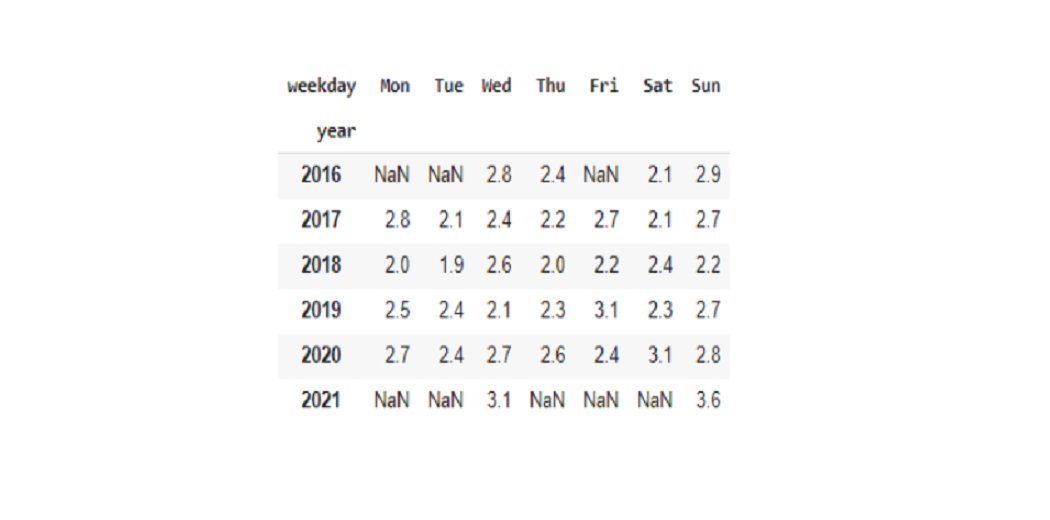

Most of the Uber ride travelers are IT Job workers and Office workers. They prefer traveling through Uber to their offices during weekdays. So, there are not many people willing to travel on weekends due to off days from work.

In [ ]:
#creating an auxiliar data frame to be displayed in category plot

aux_serie = round((completed_rides.groupby('weekday')['fare_amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)
amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)
sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

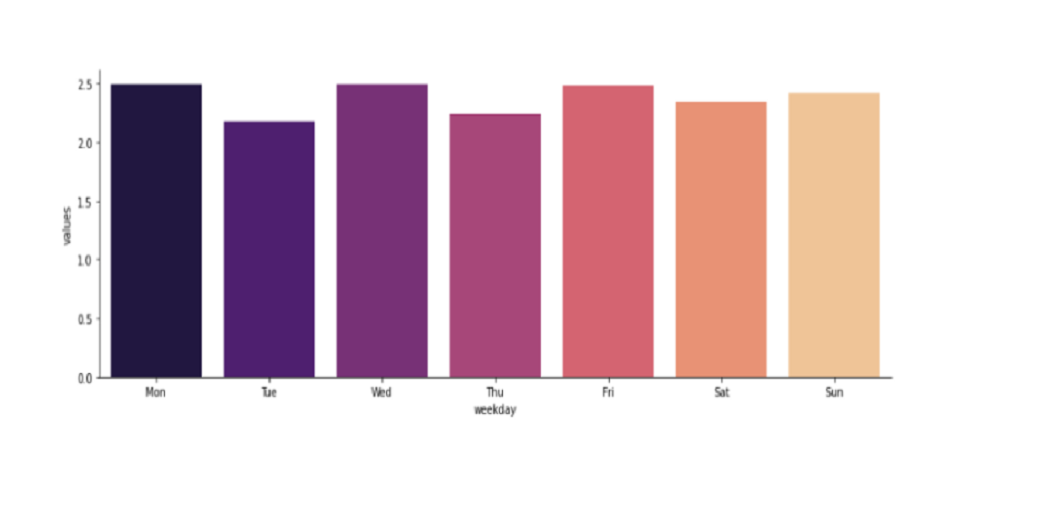

### g. Which is the longest / shortest and most expensive / cheapest ride?
The table below shows the longest record (31.77 km) and the shortest ride (0.24 km).
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]

In [ ]:
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

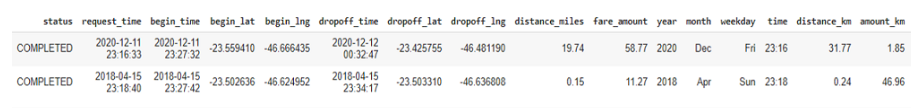

The full paid mileage price we have: expensive (46.96 BRL / km) and cheap (0 BRL / km). Cheap travel certainly means a free ride, while the cost is 46.96 BRL. This result is driven by a constant low cost at the most demanding times, as the total distance was only 0.24km.

In [ ]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])
rides_amount_km

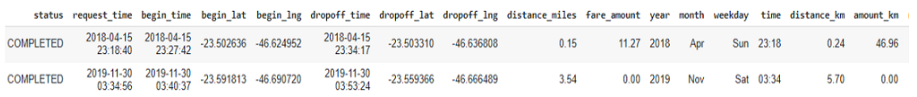

Short-distance Uber rides are quite cheap, compared to long-distance. Uber can fix some amount per kilometer can set minimum limit for traveling in Uber.

### h. What is the average lead time before requesting a trip?
It takes about five minutes to start the journey, after which it has been requested.

In [ ]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes

### Conclusion
Explanatory Data Analysis is no small feat! It takes a lot of work and patience, but it is certainly a powerful tool if used properly in the context of your business.
After analyzing the various parameters, here are a few guidelines that we can conclude. If you were a Business analyst or data scientist working for Uber or Lyft, you could come to the following conclusions:

#### Uber is very economical; however, Lyft also offers fair competition.
#### People prefer to have a shared ride in the middle of the night.
#### People avoid riding when it rains.
#### When traveling long distances, the price does not increase by line. However, based on time and demand, increases can affect costs.
#### Uber could be the first choice for long distances.
#### However, obtaining and analyzing the same data is the point of several companies. There are many businesses in the market that can help bring data from many sources and in various ways to your favorite data storage.

This guide briefly outlines some of the tips and tricks to simplify analysis and undoubtedly highlighted the critical importance of a well-defined business problem, which directs all coding efforts to a particular purpose and reveals key details. This business case also attempted to demonstrate the basic use of python in everyday business activities, showing how fun, important, and fun it can be.

## Exploratory data analysis for Uber trips

Data: https://www.kaggle.com/code/mohamed08/exploratory-data-analysis-for-uber-trips/data

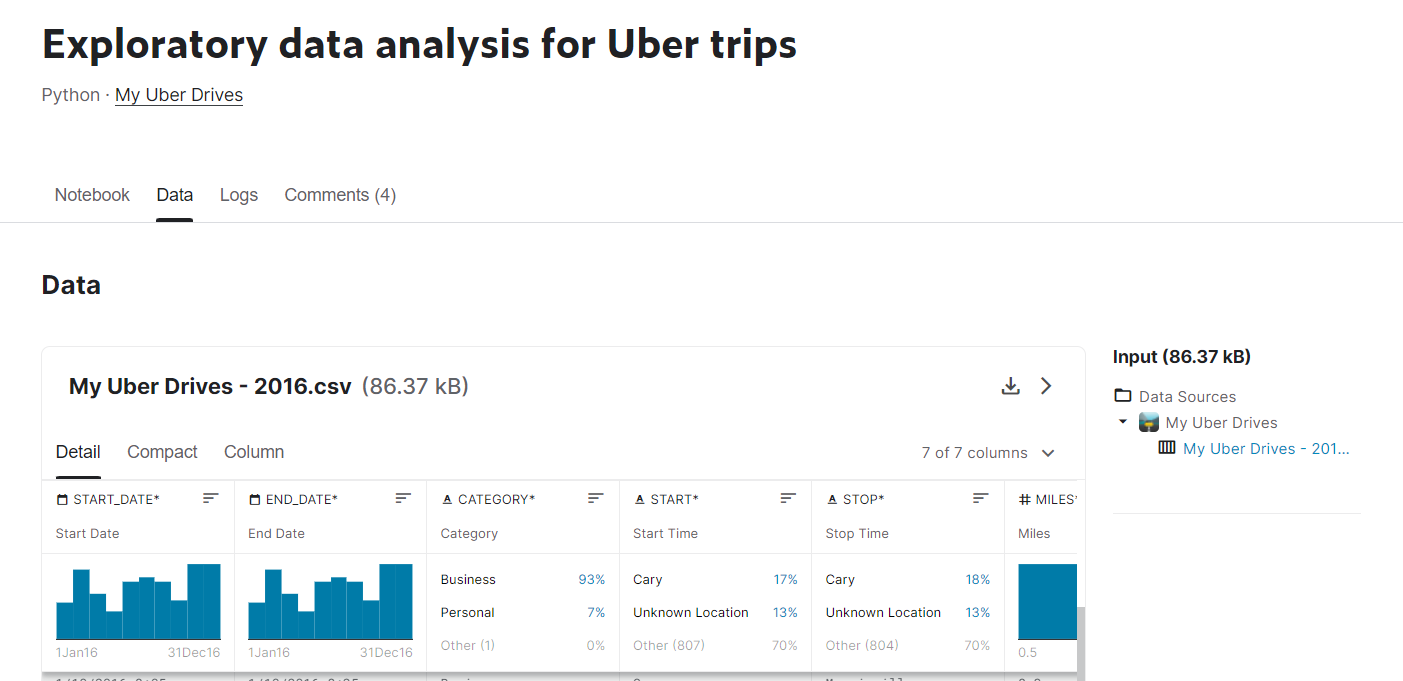

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

In [ ]:
uber_df=pd.read_csv("../input/My Uber Drives - 2016.csv")

In [ ]:
uber_df.head()

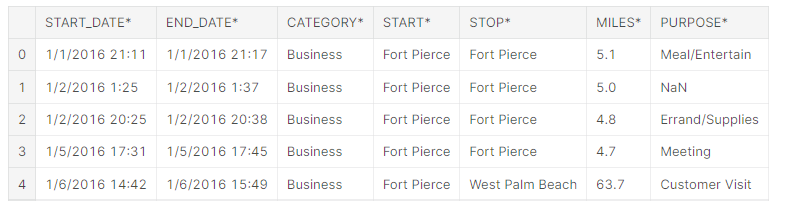

In [ ]:
# Remove uncessary data
uber_df = uber_df[:-1]

In [ ]:
# fix data types of data columns

def convert_time(column_name):
    y=[]
    for x in uber_df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    uber_df[column_name] = y

In [ ]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [ ]:
# check that all data is fixed and ready to work on it
uber_df.info()

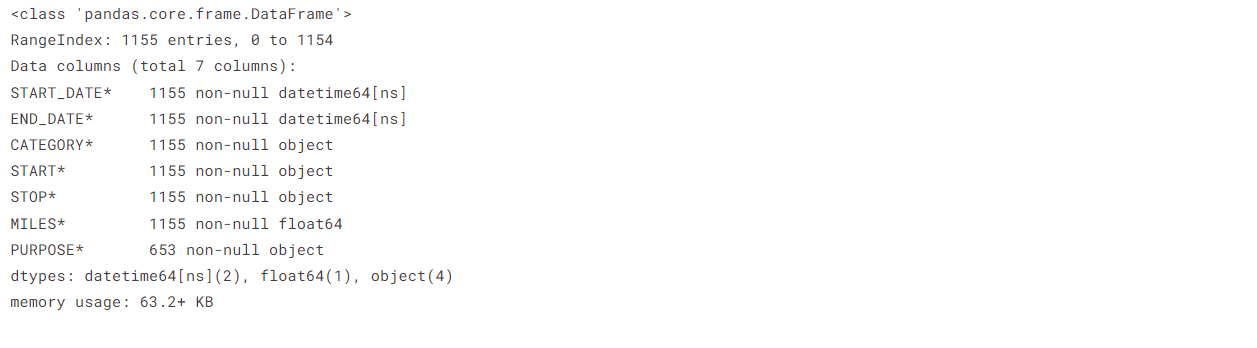

In [ ]:
# plot number of trip at each category
x = uber_df['CATEGORY*'].value_counts().plot(kind='bar')

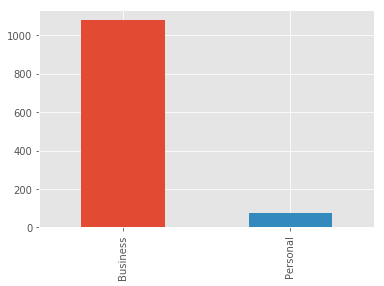

As we notice that the most trips made in business category with huge difference beteewn it and personal category.

In [ ]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month

In [ ]:
# calculate duration of each trip in minutes
minutes=[]
uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['Duration_Minutes']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber_df['Duration_Minutes'] = minutes

In [ ]:
# plot number of trips at each month
x = uber_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

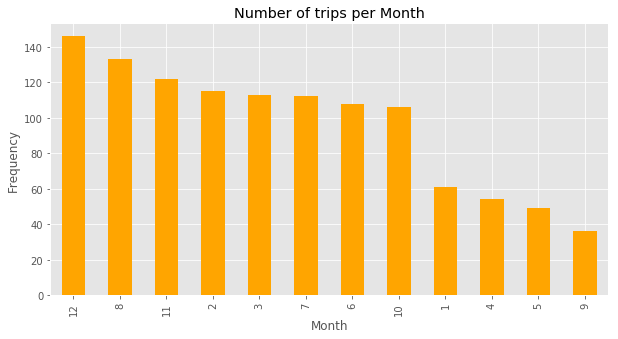

In [ ]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

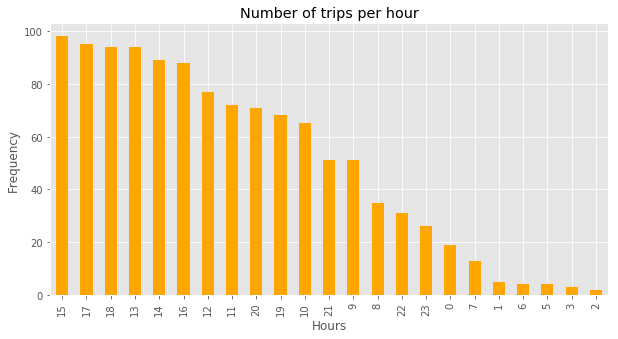

In [ ]:
# see how many trips made by each purpose
purpose_time = uber_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

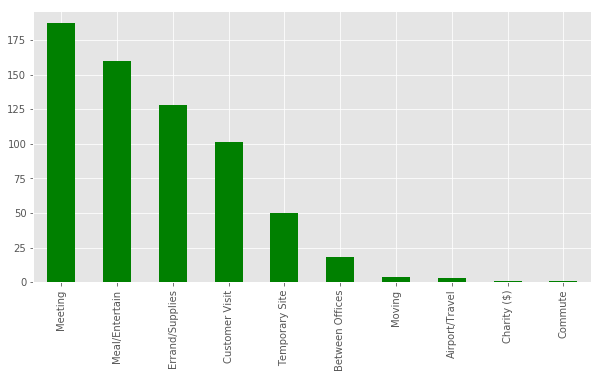

we need to know the speed of each drive to accomplish each trip, we need to calculate trip in hours at the first and save it into [duraion_hours] and then apply speed law speed = distance / time

In [ ]:
# aveverage of each trip according to purpose
purpose = uber_df.groupby('PURPOSE*').mean()
purpose.plot(kind = 'bar',figsize=(15,5))

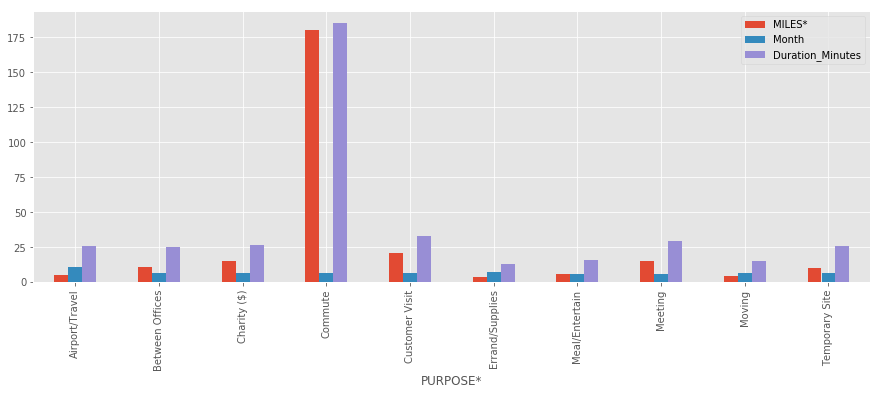

In [ ]:
# calculate trip speed for each driver
uber_df['Duration_hours'] = uber_df['Duration_Minutes'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']
uber_df['Speed_KM']

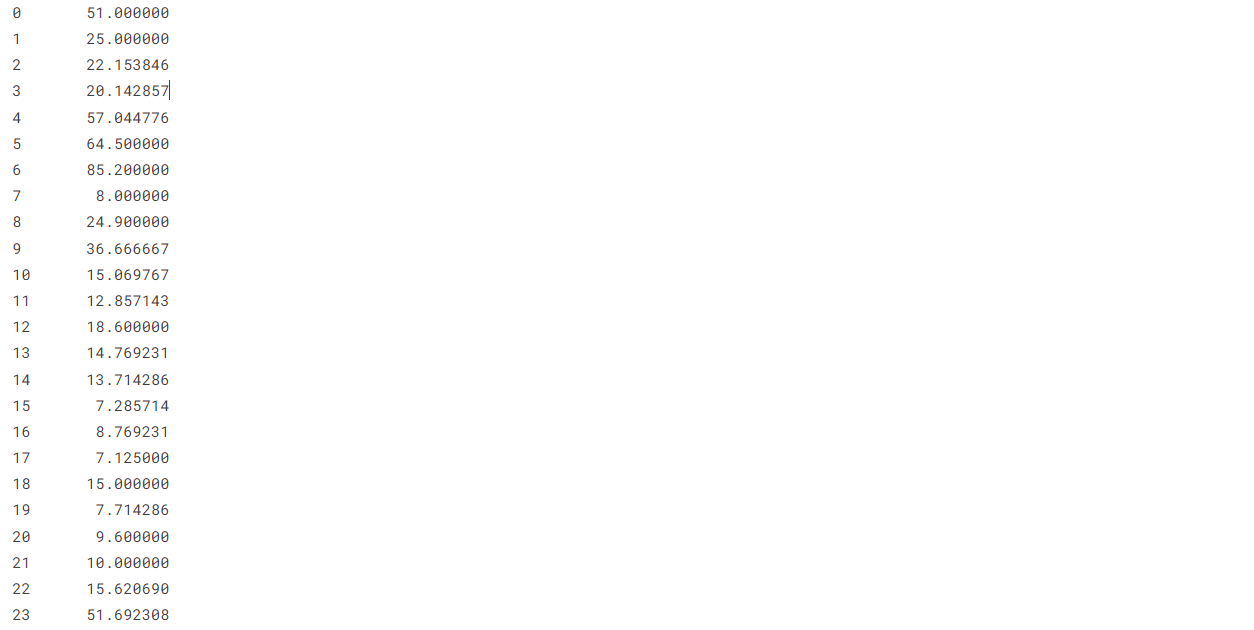

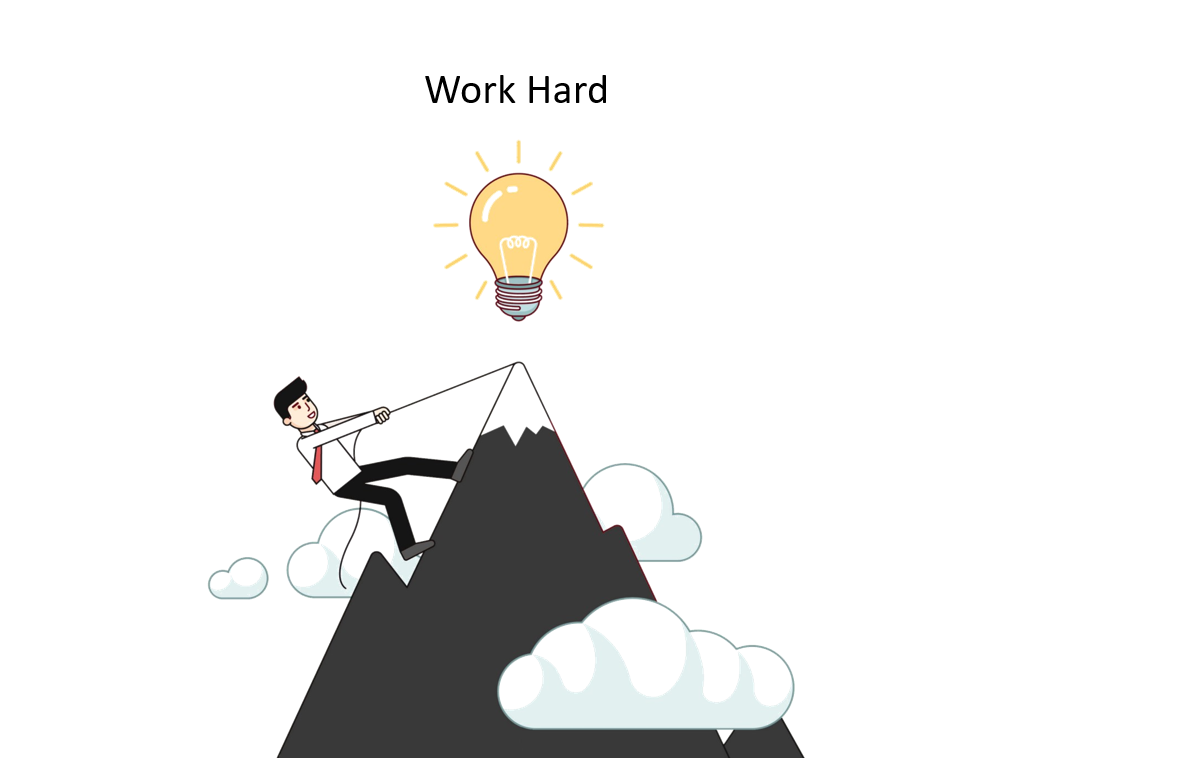

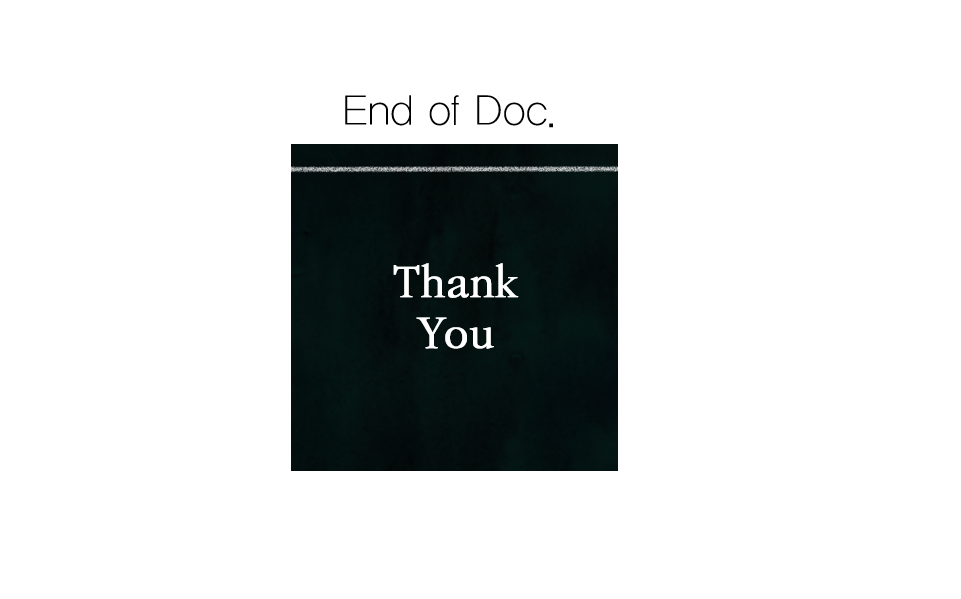